# Introduction

**Ciera**: For this introduction, explain why you switched to Python. What benefit did you have from using Python?
This is a python notebook about the analyzing of our interested species. I decide to switch to Python because I am more familiar to its syntax and python is more like a prograaming language compared with R so maybe python codes are more extensible and having more chance to be applied in more fields.

In [2]:
## **Ciera**: Do we need all these "assert" lines?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams
import csv
import zipfile
import sys
assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt
assert 'seaborn'in sys.modules and sns
import io 
from pandas.io.json import json_normalize
import json
import re
import warnings
warnings.filterwarnings('ignore')

**Ciera**: Explain where you left off and what this dinosaur data is.  

In [3]:
result = pd.read_csv('../data/output/dinasourdata.csv')
result.head()

,Unnamed: 0,occurrence_no,record_type,collection_no,taxon_name,taxon_rank,taxon_no,matched_name,matched_rank,matched_no,...,genus,genus_no,family,family_no,order,order_no,species_reso,genus_reso,subgenus_name,subgenus_reso
0,1:1,41524,occurrence,3257,Aves indet.,class,36616,Aves,class,36616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1:2,41580,occurrence,3256,Aves indet.,class,36616,Aves,class,36616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1:3,139242,occurrence,11890,Gorgosaurus sternbergi n. sp.,species,63900,Gorgosaurus libratus,species,53194,...,Gorgosaurus,53193.0,Tyrannosauridae,38606.0,Avetheropoda,55483.0,n. sp.,NaN,NaN,NaN
3,1:4,139249,occurrence,11892,Hadrosauridae indet.,family,38755,Hadrosauridae,family,38755,...,NaN,NaN,Hadrosauridae,38755.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1:5,139250,occurrence,11893,Gorgosaurus libratus,species,53194,Gorgosaurus libratus,species,53194,...,Gorgosaurus,53193.0,Tyrannosauridae,38606.0,Avetheropoda,55483.0,NaN,NaN,NaN,NaN


In [4]:
## Cleaning
result = result.drop(result.columns[0], axis = 1)
result.describe()


,occurrence_no,collection_no,taxon_no,matched_no,early_age,late_age,lng,lat,class_no,phylum_no,reid_no,genus_no,family_no,order_no
count,1.871500e+04,18715.000000,18715.000000,18715.000000,18715.000000,18715.000000,18715.000000,18715.000000,18715.000000,18715.0,1387.000000,14084.000000,17388.000000,13147.000000
mean,1.007908e+06,110472.344697,169625.440930,172071.922896,40.873736,36.166955,-30.678170,23.549320,37294.415496,33815.0,26163.681327,122283.058506,56928.825224,63197.061991
std,3.943022e+05,67243.271137,140674.254198,142051.482106,51.961096,47.543049,95.074028,30.264978,946.499271,0.0,7574.357368,116781.612520,61621.603388,73172.916779
min,4.152400e+04,3256.000000,36610.000000,36610.000000,0.011700,0.000000,-179.154999,-84.333336,36616.000000,33815.0,10065.000000,34625.000000,38539.000000,36617.000000
25%,6.041835e+05,49797.000000,39581.000000,39532.500000,0.126000,0.011700,-108.397202,14.135000,36616.000000,33815.0,18922.500000,39409.000000,38817.000000,39306.000000
50%,1.171016e+06,93374.000000,94492.000000,94501.000000,4.900000,1.806000,-74.550003,36.290001,36616.000000,33815.0,28475.000000,67686.000000,39445.000000,39441.000000
75%,1.403886e+06,192632.500000,367722.000000,368018.000000,83.500000,70.600000,24.261944,43.581945,38505.000000,33815.0,33113.500000,143791.000000,39656.000000,39706.000000
max,1.439352e+06,200705.000000,384927.000000,384927.000000,247.200000,242.000000,178.677002,89.039169,38712.000000,33815.0,35700.000000,384926.000000,384373.000000,379220.000000


In [5]:
# List all the column headers
list(result)

['occurrence_no',
 'record_type',
 'collection_no',
 'taxon_name',
 'taxon_rank',
 'taxon_no',
 'matched_name',
 'matched_rank',
 'matched_no',
 'early_interval',
 'late_interval',
 'early_age',
 'late_age',
 'reference_no',
 'lng',
 'lat',
 'class',
 'class_no',
 'phylum',
 'phylum_no',
 'genus_name',
 'species_name',
 'reid_no',
 'genus',
 'genus_no',
 'family',
 'family_no',
 'order',
 'order_no',
 'species_reso',
 'genus_reso',
 'subgenus_name',
 'subgenus_reso']

In [6]:
#new = result[['occurrence_no','t'axon_name','early_age','late_age']]

Read the Tyrannosauridae csv so we can manipulate the data in a pandas dataframe

In [7]:
Tyrannosauridae = pd.read_csv('../data/output/Tyrannosauridae.csv')
Tyrannosauridae = Tyrannosauridae.drop(Tyrannosauridae.columns[0], axis = 1)
Tyrannosauridae_time = Tyrannosauridae[['early_interval','late_interval','early_age','late_age','reference_no','lng']]
Tyrannosauridae_time.head()

,early_interval,late_interval,early_age,late_age,reference_no,lng
0,Late Campanian,NaN,83.5,70.6,13165;13165,-111.528732
1,Late Campanian,NaN,83.5,70.6,4205;4205,-111.549347
2,Late Campanian,NaN,83.5,70.6,4205;4205,-111.564636
3,Late Campanian,NaN,83.5,70.6,4205;4205,-111.525337
4,Late Campanian,NaN,83.5,70.6,17547;17547,-111.601021


Read the Dromaeosauridae csv so we can manipulate the data in a pandas dataframe. With the head funcion to show a glance into the data.

In [10]:
Dromaeosauridae = pd.read_csv('../data/output/Dromaeosauridae.csv')
Dromaeosauridae = Dromaeosauridae.drop(Dromaeosauridae.columns[0], axis = 1)
Dromaeosauridae_time = Dromaeosauridae[['early_interval','late_interval','early_age','late_age','reference_no','lng']]
Dromaeosauridae_time.head()

,early_interval,late_interval,early_age,late_age,reference_no,lng
0,Late Maastrichtian,NaN,70.6,66.0,4002;4002,21.049999
1,Late Campanian,NaN,83.5,70.6,5721;5721,-111.524582
2,Late Campanian,NaN,83.5,70.6,63431;63431,103.333336
3,Aptian,NaN,125.0,113.0,7600;7600,-98.476303
4,Middle Campanian,Late Campanian,83.5,70.6,13591;13591,-109.297203


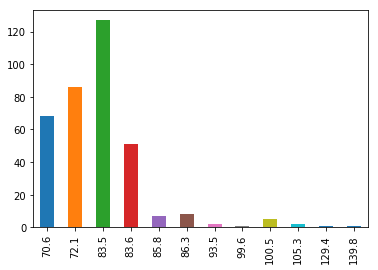

In [15]:
Tyrannosauridae_time['early_age'].value_counts().sort_index().plot.bar()

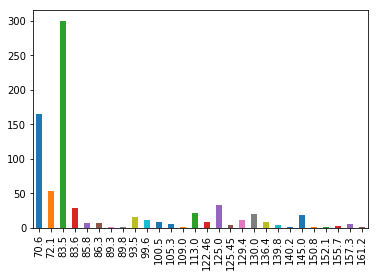

In [17]:
Dromaeosauridae_time['early_age'].value_counts().sort_index().plot.bar()

We can see that these two kinds of dinasours both occured most frequently from 83.5 million years ago to 70.6 million years ago, roughly late Cretaceous. For more information of geological time periods, this link(https://en.wikipedia.org/wiki/Geologic_time_scale#Dating_of_time_scales) is a great reference.

Also, Dromaeosauridae has a wider active age period, from 161.2 million years ago to 70.6 million years ago.

Are there duplicate rows within our data? We should drop them all. 

In [17]:
Tyrannosauridae_time = Tyrannosauridae_time.drop_duplicates(keep=False)
Tyrannosauridae_time.shape

(271, 6)

In [18]:
Dromaeosauridae_time = Dromaeosauridae_time.drop_duplicates(keep=False)
Dromaeosauridae_time.shape

(379, 6)

## This part?

**Ciera**: Is this just the part you didn't finish? You were going to map their migratory patterns?


In [15]:
# Sort the two data frames according to the early age of occurence.
Dromaeosauridae_time = Dromaeosauridae_time.sort_values(by=['early_age'], ascending=False)
Tyrannosauridae_time = Tyrannosauridae_time.sort_values(by=['early_age'], ascending=False)

The frame_to_dictionary function helps us to transform the dataframes to dictionary, and the dictionary is composed of key and value. The key is the early age of each species. The value is a dataframe of the species with same early age. 

In [19]:
def frame_to_dictionary(data):
    x = data.groupby('early_age')
    tuplea = list(x)
    desired = dict((x, y) for x, y in tuplea)
    return desired

Transform the Dromaeosauridae and Tyrannosauridae to dictionaries as described

In [17]:
grouped_Dromaeosauridae = frame_to_dictionary(Dromaeosauridae_time)
grouped_Tyrannosauridae = frame_to_dictionary(Tyrannosauridae_time)

Export each dictionaries to csv files so that we can get time based species categories so we can visualize the immigrations two species overtime with the pbdb map function.

In [18]:
a = 0
while a < len(list(grouped_Dromaeosauridae.keys())):
    key = list(grouped_Dromaeosauridae.keys())[a]
    x = str(key) + 'Dromaeosauridae'
    df = pd.DataFrame(grouped_Dromaeosauridae[list(grouped_Dromaeosauridae.keys())[a]])
    df.to_csv('../data/output/Dromaeosauridae/' + x +'.csv')
    a += 1

In [19]:
a = 0
while a < len(list(grouped_Tyrannosauridae.keys())):
    key = list(grouped_Tyrannosauridae.keys())[a]
    x = str(key) + 'Tyrannosauridae'
    df = pd.DataFrame(grouped_Tyrannosauridae[list(grouped_Tyrannosauridae.keys())[a]])
    df.to_csv('../data/output/Tyrannosauridae/' + x +'.csv')
    a += 1

If you see the cell below prints 'Done!' after clicking run all, it means the whole notebook is running with no bug, congratulations on me!

In [20]:
print('Done!')

Done!
